# Analisis y Visualización
Basado en los ejercicios resueltos número 5 y 10 de python, calcular y visualizar diferentes medidas.

Partimos de saber que la columna type_id = 16 son goles y type_id 0 17 son tarjetas

Ficheros que usaremos:

- `eventos_examen.csv`
- `opta_id_equipos.json`
- `opta_players_info_2018_2019.csv`

In [58]:
# Importar Librerias
import os
import json
import numpy as np
import pandas as pd

# Librerías de visualización
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Circle
# carga de la librería datetime
from datetime import datetime

# Configuración de Seaborn para los colores de las visualizaciones
sns.set_context("notebook")
sns.set_palette('husl')

### Ver ruta del directorio

In [59]:
pwd

'/Users/javiersaldana/Documents/Master Big Data/Modulo 4 Analisis de datos deportivos con R y Python/Ejercicios_resueltos_python'

### Lista de archivos

In [60]:
ls

01_Instalacion_y_diagnostico.ipynb
02_Elaboracion_notebooks.ipynb
03_Pandas_import_export.ipynb
04_Pandas_manejo_dataframes.ipynb
05_Analisis_y_Visualizacion.ipynb
06_Limpieza_dataset.ipynb
07_leer_ficheros_squads_OPTA.ipynb
08_Leer_ficheros_eventdetails_OPTA.ipynb
09_Leer_ficheros_pass_matrix_Opta.ipynb
10_Visualizar_eventos_opta.ipynb
10_Visualizar_eventos_opta_usando_mplsoccer.ipynb
11_Calculo_correlacion_datos.ipynb
12_Webscrapping_para_crear_dataset.ipynb
13_Conexion_API_twitter.ipynb
M4T1 Python Javier Saldana.docx
M4T1 Python Javier Saldana.html
M4T1 Python Javier Saldana.ipynb
data/
datos_ejercicio_examen/
img/
~$T1 Python Javier Saldana.docx


In [61]:
print("¿Existe el directorio?", os.path.isdir("data") )

¿Existe el directorio? True


In [62]:
# Carga de fichero de información
ruta_eventos = os.path.join(".","data","eventos_examen.csv")
dfeventos = pd.read_csv(ruta_eventos, encoding='utf_8') 
print("Ruta donde se busca el fichero: \n ", os.getcwd(), ruta_eventos)
print("¿Existe el fichero en la ruta definida?", os.path.isfile(ruta_eventos))

ruta_jugadores = os.path.join(".","data","opta_players_info_2018_2019.csv")
dfjugadores = pd.read_csv(ruta_jugadores, encoding='utf_8') 
print("Ruta donde se busca el fichero: \n ", os.getcwd(), ruta_jugadores)
print("¿Existe el fichero en la ruta definida?", os.path.isfile(ruta_jugadores))

ruta_equipos = os.path.join(".","data","opta_id_equipos.json")
with open(ruta_equipos, 'r') as fp:
    id_equipos = json.load(fp)
id_equipos
print("Ruta donde se busca el fichero: \n ", os.getcwd(), ruta_equipos)
print("¿Existe el fichero en la ruta definida?", os.path.isfile(ruta_equipos))

Ruta donde se busca el fichero: 
  /Users/javiersaldana/Documents/Master Big Data/Modulo 4 Analisis de datos deportivos con R y Python/Ejercicios_resueltos_python ./data/eventos_examen.csv
¿Existe el fichero en la ruta definida? True
Ruta donde se busca el fichero: 
  /Users/javiersaldana/Documents/Master Big Data/Modulo 4 Analisis de datos deportivos con R y Python/Ejercicios_resueltos_python ./data/opta_players_info_2018_2019.csv
¿Existe el fichero en la ruta definida? True
Ruta donde se busca el fichero: 
  /Users/javiersaldana/Documents/Master Big Data/Modulo 4 Analisis de datos deportivos con R y Python/Ejercicios_resueltos_python ./data/opta_id_equipos.json
¿Existe el fichero en la ruta definida? True


# 1 Inspeccion de datos

Analisis de los datos que datos hay en el dataset y en qué forma los tenemos.

## 1.1 - Explorar el archivo Jugadores

In [63]:
# Archivo Opta_Players
print(dfjugadores.columns)
dfjugadores.head(5)

Index(['season_id', 'season_name', 'competition_id', 'competition_name',
       'club_id', 'player_id', 'club', 'first_name', 'last_name', 'birth_date',
       'birth_place', 'first_nationality', 'preferred_foot', 'weight',
       'height', 'jersey_num', 'real_position', 'real_position_side',
       'join_date', 'country', 'known_name', 'on_loan_from', 'middle_name'],
      dtype='object')


,season_id,season_name,competition_id,competition_name,club_id,player_id,club,first_name,last_name,birth_date,...,weight,height,jersey_num,real_position,real_position_side,join_date,country,known_name,on_loan_from,middle_name
0,2018,Season 2018/2019,23,Spanish La Liga,t173,p91406,Deportivo Alavés S.A.D.,Fernando,Pacheco,1992-05-18,...,81,186,1,Goalkeeper,Unknown,2015-08-07,Spain,NaN,NaN,NaN
1,2018,Season 2018/2019,23,Spanish La Liga,t173,p176245,Deportivo Alavés S.A.D.,Antonio,Sivera,1996-08-11,...,75,184,13,Goalkeeper,Unknown,2017-07-19,Spain,NaN,NaN,NaN
2,2018,Season 2018/2019,23,Spanish La Liga,t173,p439750,Deportivo Alavés S.A.D.,Alejandro,Domínguez,1998-07-30,...,80,187,31,Goalkeeper,Unknown,2018-08-16,Spain,Álex Domínguez,NaN,NaN
3,2018,Season 2018/2019,23,Spanish La Liga,t173,p167539,Deportivo Alavés S.A.D.,Carlos,Vigaray,1994-09-07,...,70,182,2,Full Back,Right,2016-08-12,Spain,NaN,NaN,NaN
4,2018,Season 2018/2019,23,Spanish La Liga,t173,p126119,Deportivo Alavés S.A.D.,Rubén,Duarte,1995-10-18,...,75,180,3,Full Back,Left,2017-07-01,Spain,NaN,NaN,NaN


In [64]:
dfjugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   season_id           591 non-null    int64 
 1   season_name         591 non-null    object
 2   competition_id      591 non-null    int64 
 3   competition_name    591 non-null    object
 4   club_id             591 non-null    object
 5   player_id           591 non-null    object
 6   club                591 non-null    object
 7   first_name          591 non-null    object
 8   last_name           591 non-null    object
 9   birth_date          591 non-null    object
 10  birth_place         584 non-null    object
 11  first_nationality   585 non-null    object
 12  preferred_foot      575 non-null    object
 13  weight              591 non-null    object
 14  height              591 non-null    object
 15  jersey_num          591 non-null    object
 16  real_position       591 no

In [65]:
print("Filas:, ", dfjugadores.shape[0], " , Columnas", dfjugadores.shape[1])

Filas:,  591  , Columnas 23


In [66]:
dfjugadores['player_id'].duplicated().value_counts()

False    591
Name: player_id, dtype: int64

In [67]:
dfjugadores.isna().any()

season_id             False
season_name           False
competition_id        False
competition_name      False
club_id               False
player_id             False
club                  False
first_name            False
last_name             False
birth_date            False
birth_place            True
first_nationality      True
preferred_foot         True
weight                False
height                False
jersey_num            False
real_position         False
real_position_side    False
join_date             False
country               False
known_name             True
on_loan_from           True
middle_name            True
dtype: bool

In [68]:
dfjugadores.isnull().any()

season_id             False
season_name           False
competition_id        False
competition_name      False
club_id               False
player_id             False
club                  False
first_name            False
last_name             False
birth_date            False
birth_place            True
first_nationality      True
preferred_foot         True
weight                False
height                False
jersey_num            False
real_position         False
real_position_side    False
join_date             False
country               False
known_name             True
on_loan_from           True
middle_name            True
dtype: bool

In [69]:
# Seleccionar las columnas que interesan y preparacion de los datos
dfjugadores = dfjugadores[['club_id','club','player_id','first_name','last_name','real_position']]
dfjugadores['club_id']= dfjugadores['club_id'].str.replace("t","")
dfjugadores['club_id']= dfjugadores['club_id'].astype(np.int32)
dfjugadores['player_id']= dfjugadores['player_id'].str.replace("p","")
dfjugadores['player_id']= dfjugadores['player_id'].astype(np.int32)
dfjugadores['jugador'] = dfjugadores['first_name'].map(str) + " "+dfjugadores['last_name'].map(str)
dfjugadores.drop(columns=['first_name','last_name'], inplace=True)
dfjugadores.head()

,club_id,club,player_id,real_position,jugador
0,173,Deportivo Alavés S.A.D.,91406,Goalkeeper,Fernando Pacheco
1,173,Deportivo Alavés S.A.D.,176245,Goalkeeper,Antonio Sivera
2,173,Deportivo Alavés S.A.D.,439750,Goalkeeper,Alejandro Domínguez
3,173,Deportivo Alavés S.A.D.,167539,Full Back,Carlos Vigaray
4,173,Deportivo Alavés S.A.D.,126119,Full Back,Rubén Duarte


## 1.2 - Explorar el archivo Equipos

In [70]:
id_equipos

{'t188': 'Real Sociedad',
 't2894': 'Huesca',
 't174': 'Athletic Club',
 't179': 'Sevilla',
 't186': 'Real Madrid',
 't2893': 'Girona',
 't953': 'Eibar',
 't185': 'Real Betis',
 't957': 'Leganés',
 't192': 'Real Valladolid',
 't1450': 'Getafe',
 't184': 'Rayo Vallecano',
 't176': 'Celta de Vigo',
 't191': 'Valencia CF',
 't173': 'Alavés',
 't177': 'Espanyol',
 't178': 'Barcelona',
 't175': 'Atlético de Madrid',
 't449': 'Villarreal',
 't855': 'Levante'}

In [71]:
#preparar la informacion del archivo de Equipos (JSON)
equipo_id_name = {}
for everyid in id_equipos.keys():
    nuevo_id = everyid.replace("t","")
    equipo_id_name[nuevo_id] = id_equipos[everyid]
print(equipo_id_name)

{'188': 'Real Sociedad', '2894': 'Huesca', '174': 'Athletic Club', '179': 'Sevilla', '186': 'Real Madrid', '2893': 'Girona', '953': 'Eibar', '185': 'Real Betis', '957': 'Leganés', '192': 'Real Valladolid', '1450': 'Getafe', '184': 'Rayo Vallecano', '176': 'Celta de Vigo', '191': 'Valencia CF', '173': 'Alavés', '177': 'Espanyol', '178': 'Barcelona', '175': 'Atlético de Madrid', '449': 'Villarreal', '855': 'Levante'}


## 1.3 - Explorar el archivo Eventos

In [72]:
print(dfeventos['player_id'].head(5))
# Mostrar una linea de asteriscos
print("*"*10)
# Rellenar los valores nA por 0
dfeventos['player_id'].fillna(0, inplace=True)
dfeventos['player_id']= dfeventos['player_id'].astype(np.int32)
dfeventos['player_id'].head(5)

0         NaN
1         NaN
2         NaN
3         NaN
4    196739.0
Name: player_id, dtype: float64
**********


0         0
1         0
2         0
3         0
4    196739
Name: player_id, dtype: int32

In [73]:
print(dfeventos.columns)
dfeventos.head(5)

Index(['id', 'event_id', 'type_id', 'team_id', 'outcome', 'player_id',
       'timestamp', 'x', 'y', 'year', 'month', 'day'],
      dtype='object')


,id,event_id,type_id,team_id,outcome,player_id,timestamp,x,y,year,month,day
0,885090318,1,34,173,1,0,2019-08-18T14:59:04.157,0.0,0.0,2019,8,18
1,1276379495,1,34,855,1,0,2019-08-18T15:02:34.71,0.0,0.0,2019,8,18
2,449921185,2,32,173,1,0,2019-08-18T16:01:47.516,0.0,0.0,2019,8,18
3,1575326587,2,32,855,1,0,2019-08-18T16:01:47.516,0.0,0.0,2019,8,18
4,1090078082,3,1,855,1,196739,2019-08-18T16:01:48.794,50.0,50.0,2019,8,18


In [74]:
dfeventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648171 entries, 0 to 648170
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         648171 non-null  int64  
 1   event_id   648171 non-null  int64  
 2   type_id    648171 non-null  int64  
 3   team_id    648171 non-null  int64  
 4   outcome    648171 non-null  int64  
 5   player_id  648171 non-null  int32  
 6   timestamp  648171 non-null  object 
 7   x          648171 non-null  float64
 8   y          648171 non-null  float64
 9   year       648171 non-null  int64  
 10  month      648171 non-null  int64  
 11  day        648171 non-null  int64  
dtypes: float64(2), int32(1), int64(8), object(1)
memory usage: 56.9+ MB


In [75]:
print("Filas:, ", dfeventos.shape[0], " , Columnas", dfeventos.shape[1])

Filas:,  648171  , Columnas 12


In [76]:
# Confirmar el numero de equipos que hay
len(dfeventos['team_id'].unique())

20

In [77]:
# Ver cuantos jugadores han participado en los partidos
dfeventos['player_id'].value_counts().count()

559

In [78]:
dfeventos['timestamp']= dfeventos['timestamp'].str.replace('T',' ')

# 2 Preparar la informacion de eventos

## 2.1 Identificar a los jugadores

In [79]:
df_eventos_detalles = pd.merge(dfeventos, dfjugadores, 
                                 left_on = 'player_id', right_on='player_id')
df_eventos_detalles.head(5)

,id,event_id,type_id,team_id,outcome,player_id,timestamp,x,y,year,month,day,club_id,club,real_position,jugador
0,1090078082,3,1,855,1,196739,2019-08-18 16:01:48.794,50.0,50.0,2019,8,18,855,Levante Unión Deportiva S.A.D.,Central Midfielder,Enis Bardhi
1,423966377,43,43,855,1,196739,2019-08-18 16:04:27.451,0.0,0.0,2019,8,18,855,Levante Unión Deportiva S.A.D.,Central Midfielder,Enis Bardhi
2,1860762372,57,5,855,1,196739,2019-08-18 16:06:39.60,-1.0,7.8,2019,8,18,855,Levante Unión Deportiva S.A.D.,Central Midfielder,Enis Bardhi
3,954208382,78,15,855,1,196739,2019-08-18 16:08:48.921,77.1,67.0,2019,8,18,855,Levante Unión Deportiva S.A.D.,Central Midfielder,Enis Bardhi
4,857460621,92,4,855,1,196739,2019-08-18 16:10:09.861,24.7,33.0,2019,8,18,855,Levante Unión Deportiva S.A.D.,Central Midfielder,Enis Bardhi


## 2.2 Identificar a los equipos

In [80]:
df_eventos_detalles['team'] = df_eventos_detalles['team_id'].map(str).map(equipo_id_name)
df_eventos_detalles[['team','team_id']].sample(3)

,team,team_id
97883,Getafe,1450
128237,Real Valladolid,192
309732,Leganés,957


In [81]:
# Ver el resultado de la union
df_eventos_detalles

,id,event_id,type_id,team_id,outcome,player_id,timestamp,x,y,year,month,day,club_id,club,real_position,jugador,team
0,1090078082,3,1,855,1,196739,2019-08-18 16:01:48.794,50.0,50.0,2019,8,18,855,Levante Unión Deportiva S.A.D.,Central Midfielder,Enis Bardhi,Levante
1,423966377,43,43,855,1,196739,2019-08-18 16:04:27.451,0.0,0.0,2019,8,18,855,Levante Unión Deportiva S.A.D.,Central Midfielder,Enis Bardhi,Levante
2,1860762372,57,5,855,1,196739,2019-08-18 16:06:39.60,-1.0,7.8,2019,8,18,855,Levante Unión Deportiva S.A.D.,Central Midfielder,Enis Bardhi,Levante
3,954208382,78,15,855,1,196739,2019-08-18 16:08:48.921,77.1,67.0,2019,8,18,855,Levante Unión Deportiva S.A.D.,Central Midfielder,Enis Bardhi,Levante
4,857460621,92,4,855,1,196739,2019-08-18 16:10:09.861,24.7,33.0,2019,8,18,855,Levante Unión Deportiva S.A.D.,Central Midfielder,Enis Bardhi,Levante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465533,2200442597,772,1,192,0,246214,2020-07-16 19:16:35.508,3.6,56.4,2020,7,16,192,Real Valladolid Club de Fútbol S.A.D.,Goalkeeper,Samuel Pérez,Real Valladolid
465534,2200442827,778,1,192,1,246214,2020-07-16 19:17:26.282,4.3,51.8,2020,7,16,192,Real Valladolid Club de Fútbol S.A.D.,Goalkeeper,Samuel Pérez,Real Valladolid
465535,2200443841,789,58,192,0,246214,2020-07-16 19:20:30.709,0.0,0.0,2020,7,16,192,Real Valladolid Club de Fútbol S.A.D.,Goalkeeper,Samuel Pérez,Real Valladolid
465536,2200444525,809,1,192,0,246214,2020-07-16 19:23:09.806,14.5,67.3,2020,7,16,192,Real Valladolid Club de Fútbol S.A.D.,Goalkeeper,Samuel Pérez,Real Valladolid


# 3 - Creacion de Dataframes para las visualizaciones

In [82]:
# Seleccionar las columnas que interesan
df_eventos_detalles.drop(columns=['player_id','team_id','club','club_id'], inplace=True)
df_eventos_detalles.head(5)

,id,event_id,type_id,outcome,timestamp,x,y,year,month,day,real_position,jugador,team
0,1090078082,3,1,1,2019-08-18 16:01:48.794,50.0,50.0,2019,8,18,Central Midfielder,Enis Bardhi,Levante
1,423966377,43,43,1,2019-08-18 16:04:27.451,0.0,0.0,2019,8,18,Central Midfielder,Enis Bardhi,Levante
2,1860762372,57,5,1,2019-08-18 16:06:39.60,-1.0,7.8,2019,8,18,Central Midfielder,Enis Bardhi,Levante
3,954208382,78,15,1,2019-08-18 16:08:48.921,77.1,67.0,2019,8,18,Central Midfielder,Enis Bardhi,Levante
4,857460621,92,4,1,2019-08-18 16:10:09.861,24.7,33.0,2019,8,18,Central Midfielder,Enis Bardhi,Levante


In [83]:
df_eventos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465538 entries, 0 to 465537
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             465538 non-null  int64  
 1   event_id       465538 non-null  int64  
 2   type_id        465538 non-null  int64  
 3   outcome        465538 non-null  int64  
 4   timestamp      465538 non-null  object 
 5   x              465538 non-null  float64
 6   y              465538 non-null  float64
 7   year           465538 non-null  int64  
 8   month          465538 non-null  int64  
 9   day            465538 non-null  int64  
 10  real_position  465538 non-null  object 
 11  jugador        465538 non-null  object 
 12  team           453163 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 49.7+ MB


In [84]:
# Renombrar algunas columnas
df_eventos_detalles = df_eventos_detalles.rename(columns = {'team': 'equipo', 'real_position': 'posicion'})                                         

In [85]:
# Seleccionar por type_id 16
df_eventos_detalles[df_eventos_detalles['type_id'] == 16 ]

,id,event_id,type_id,outcome,timestamp,x,y,year,month,day,posicion,jugador,equipo
229,2161505793,187,16,1,2019-10-30 18:24:04.268,88.6,38.8,2019,10,30,Central Midfielder,Enis Bardhi,Levante
623,2171689897,756,16,1,2019-12-14 13:47:58.361,80.3,50.3,2019,12,14,Central Midfielder,Enis Bardhi,Levante
1267,2195437851,623,16,1,2020-06-20 14:32:59.232,85.3,55.9,2020,6,20,Central Midfielder,Enis Bardhi,Levante
1384,2196912381,224,16,1,2020-06-28 13:36:28.465,91.5,73.2,2020,6,28,Central Midfielder,Enis Bardhi,Levante
1610,2199567345,681,16,1,2020-07-12 17:33:15.990,98.0,47.4,2020,7,12,Central Midfielder,Enis Bardhi,Levante
...,...,...,...,...,...,...,...,...,...,...,...,...,...
461713,2188207911,880,16,1,2020-03-01 21:49:43.145,96.8,35.6,2020,3,1,Striker,Mariano Díaz Mejía,Real Madrid
461956,2196289347,579,16,1,2020-06-24 19:52:43.42,91.1,65.8,2020,6,24,Full Back,Antonio Latorre Grueso,NaN
463725,2195280207,858,16,1,2020-06-18 22:36:47.676,90.9,59.1,2020,6,18,Winger,Marco Asensio,Real Madrid
463894,2199200067,595,16,1,2020-07-10 22:10:31.92,92.7,53.3,2020,7,10,Winger,Marco Asensio,Real Madrid


In [86]:
mask1 = (df_eventos_detalles['jugador'] == 'Karim Benzema') & (df_eventos_detalles['type_id'] == 16)
mask1

0         False
1         False
2         False
3         False
4         False
          ...  
465533    False
465534    False
465535    False
465536    False
465537    False
Length: 465538, dtype: bool

In [87]:
dfBenzema = df_eventos_detalles[mask1]
dfBenzema

,id,event_id,type_id,outcome,timestamp,x,y,year,month,day,posicion,jugador,equipo
197571,618478956,105,16,1,2019-08-17 16:12:29.281,97.4,52.0,2019,8,17,Striker,Karim Benzema,Real Madrid
197679,171079055,924,16,1,2019-08-24 19:38:27.559,82.9,57.3,2019,8,24,Striker,Karim Benzema,Real Madrid
197747,2149124917,308,16,1,2019-09-14 12:24:22.817,91.5,49.9,2019,9,14,Striker,Karim Benzema,Real Madrid
197754,2149127855,366,16,1,2019-09-14 12:30:43.817,87.6,48.5,2019,9,14,Striker,Karim Benzema,Real Madrid
197839,2152097085,638,16,1,2019-09-22 21:21:29.743,93.5,54.6,2019,9,22,Striker,Karim Benzema,Real Madrid
197907,2155299645,30,16,1,2019-10-05 15:02:50.890,93.0,59.1,2019,10,5,Striker,Karim Benzema,Real Madrid
198130,2161637501,793,16,1,2019-10-30 21:39:52.174,88.5,49.9,2019,10,30,Striker,Karim Benzema,Real Madrid
198191,2164205297,161,16,1,2019-11-09 17:46:25.684,93.6,67.2,2019,11,9,Striker,Karim Benzema,Real Madrid
198197,2164211757,262,16,1,2019-11-09 17:58:24.655,88.5,50.0,2019,11,9,Striker,Karim Benzema,Real Madrid
198260,2166995367,426,16,1,2019-11-23 20:36:21.677,93.7,54.0,2019,11,23,Striker,Karim Benzema,Real Madrid


In [88]:
mask2 = (df_eventos_detalles['jugador'] == 'Lionel Messi') & (df_eventos_detalles['type_id'] == 16)
mask2

0         False
1         False
2         False
3         False
4         False
          ...  
465533    False
465534    False
465535    False
465536    False
465537    False
Length: 465538, dtype: bool

In [89]:
dfMessi = df_eventos_detalles[mask2]
dfMessi

,id,event_id,type_id,outcome,timestamp,x,y,year,month,day,posicion,jugador,equipo
423982,2156143227,848,16,1,2019-10-06 21:36:32.127,79.1,36.1,2019,10,6,Second Striker,Lionel Messi,Barcelona
424039,2158243981,599,16,1,2019-10-19 13:14:45.492,92.1,55.7,2019,10,19,Second Striker,Lionel Messi,Barcelona
424177,2161297817,367,16,1,2019-10-29 20:50:10.622,73.6,34.3,2019,10,29,Second Striker,Lionel Messi,Barcelona
424227,2161347873,827,16,1,2019-10-29 21:48:46.605,85.0,59.6,2019,10,29,Second Striker,Lionel Messi,Barcelona
424276,2162286539,410,16,1,2019-11-02 15:37:58.289,88.5,50.0,2019,11,2,Second Striker,Lionel Messi,Barcelona
424350,2164295335,268,16,1,2019-11-09 20:24:00.549,88.5,50.0,2019,11,9,Second Striker,Lionel Messi,Barcelona
424381,2164308433,484,16,1,2019-11-09 20:47:25.325,72.7,43.0,2019,11,9,Second Striker,Lionel Messi,Barcelona
424386,2164316179,526,16,1,2019-11-09 21:07:30.509,74.4,47.8,2019,11,9,Second Striker,Lionel Messi,Barcelona
424629,2169173399,1035,16,1,2019-12-01 21:42:54.679,82.1,54.0,2019,12,1,Second Striker,Lionel Messi,Barcelona
424654,2170423553,197,16,1,2019-12-07 20:18:09.19,78.6,36.9,2019,12,7,Second Striker,Lionel Messi,Barcelona


# 4 - Goleadores de la liga

In [90]:
df_eventos_detalles[df_eventos_detalles['type_id']== 16]['jugador'].value_counts().head(15)

Lionel Messi             25
Karim Benzema            21
Gerard Moreno            18
Luis Suárez              16
Raúl García              15
Iago Aspas               14
Roger Martí              12
Álvaro Morata            12
Jaime Mata               11
Willian José Da Silva    11
Santiago Cazorla         11
Sergio Ramos             11
Lorenzo Morón            10
Ángel Rodríguez          10
Mikel Oyarzabal          10
Name: jugador, dtype: int64

# 5 - Equipos con mas tarjetas en La Liga

In [91]:
df_eventos_detalles[df_eventos_detalles['type_id']== 17]['equipo'].value_counts().head(15)

Getafe                126
Leganés               113
Espanyol              102
Real Betis            100
Athletic Club          90
Barcelona              88
Alavés                 88
Valencia CF            80
Celta de Vigo          79
Eibar                  79
Real Valladolid        75
Levante                71
Real Sociedad          71
Real Madrid            68
Atlético de Madrid     67
Name: equipo, dtype: int64

# 6 - Representar en el mismo campo de fútbol, pero con diferentes colores, la posición desde la que han marcado los goles Karim Benzema y Lionel Messi.

## 6.1 Pintar campo

In [92]:
# La siguiente función se encarga de preparar un campo de futbol para ser pintado:
def pintar_campo(color_campo):
    ax = plt.axes()
    
    #cambiar el color usando RGB
    ax.set_facecolor('xkcd:grass green')
    
    bottom, width, lenght= 0., 100, 100
    
    pitch_width, pitch_length=68., 105
    
    goal_width, goal_length, goal_bottom, goal_top =10.76, 1.9, 44.62, 55.38
    
    six_yard_width, six_yard_length, six_yard_left =26.4, 5.8, 5.8

    six_yard_right, six_yard_bottom, six_yard_top=94.2, 36.8, 63.2

    penalty_left, penalty_right=11.5, 88.5
    penalty_area_width, penalty_area_length, penalty_area_left=57.8 ,17.0, 17.

    penalty_area_right, penalty_area_bottom, penalty_area_top=83., 21.1, 78.9

    center_width, center_length, circle_diameter=50., 50, 17.68

    coord_x = [center_length, center_length, width, width,
                  penalty_area_right, penalty_area_right, width,
                  width, six_yard_right, six_yard_right, width,
                  width, bottom, bottom, penalty_area_left,
                  penalty_area_left, bottom, bottom, six_yard_left,
                  six_yard_left, bottom, bottom, center_length, ]
    coord_y = [bottom, lenght, lenght, penalty_area_bottom,
                  penalty_area_bottom, penalty_area_top, penalty_area_top,
                  six_yard_bottom, six_yard_bottom, six_yard_top,
                  six_yard_top, bottom, bottom, penalty_area_top,
                  penalty_area_top, penalty_area_bottom, penalty_area_bottom,
                  six_yard_top, six_yard_top, six_yard_bottom,
                  six_yard_bottom, lenght, lenght, ]

    plt.plot(coord_x, coord_y, color_campo)
    circulo_central = plt.Circle((50,50), radius=10, fill=False, color=color_campo)
    ax.add_patch(circulo_central)

    circulo_central = plt.Circle((50, 50), radius=.5, fill=True, color=color_campo)
    ax.add_patch(circulo_central)

    punto_penalti1 = plt.Circle((11, 50), radius=.5, fill=True, color=color_campo)
    ax.add_patch(punto_penalti1)

    punto_penalti2 = plt.Circle((89, 50), radius=.5, fill=True, color=color_campo)
    ax.add_patch(punto_penalti2)

    arq_izq = Arc((11,50),20, 20,theta1=310,theta2=50,color=color_campo)
    arq_dcho = Arc((89,50),20,20,theta1=130,theta2=230,color=color_campo)
    ax.add_patch(arq_izq)
    ax.add_patch(arq_dcho)


    plt.plot(coord_x, coord_y, color_campo)  
    return ax

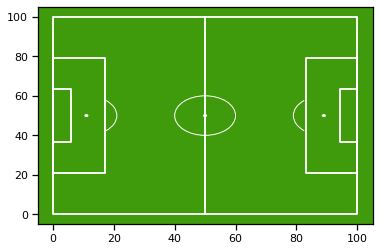

In [93]:
ax_campo = pintar_campo('white')

## 6.2 - Posición desde la que han marcado los goles Karim Benzema y Lionel Messi.

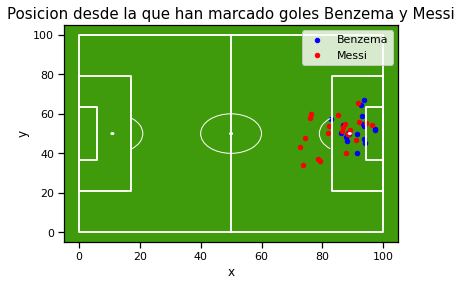

In [94]:
ax = pintar_campo('white')
dfBenzema.plot(kind='scatter', x='x', y='y', color='blue', ax=ax, label = 'Benzema')
dfMessi.plot(kind='scatter', x='x', y='y', color='red', ax=ax, label = 'Messi')
plt.legend()
ax.set_title("Posicion desde la que han marcado goles Benzema y Messi",fontsize=15);

# 7-Selecciona todos los datos de eventos del partido Atlético - Espanyol (3-1) de fecha 10-noviembre-2019.

In [95]:
# Eventos del Espanyol y Atletico el 10 de Noviembre de 2019
dfpartido = df_eventos_detalles.loc[
    (df_eventos_detalles['year']== 2019) & 
    (df_eventos_detalles['month']== 11) & 
    (df_eventos_detalles['day']== 10) &
    ((df_eventos_detalles['equipo']== 'Espanyol') | (df_eventos_detalles['equipo']== 'Atlético de Madrid'))]
dfpartido

,id,event_id,type_id,outcome,timestamp,x,y,year,month,day,posicion,jugador,equipo
87330,2164555345,20,1,1,2019-11-10 15:04:36.24,95.7,91.5,2019,11,10,Striker,Álvaro Morata,Atlético de Madrid
87331,2164557719,38,1,1,2019-11-10 15:06:58.37,42.3,96.6,2019,11,10,Striker,Álvaro Morata,Atlético de Madrid
87332,2164561275,77,1,1,2019-11-10 15:10:32.324,67.0,72.1,2019,11,10,Striker,Álvaro Morata,Atlético de Madrid
87333,2164563397,101,49,1,2019-11-10 15:12:58.937,24.9,52.2,2019,11,10,Striker,Álvaro Morata,Atlético de Madrid
87334,2164563415,102,1,0,2019-11-10 15:12:59.72,24.9,52.2,2019,11,10,Striker,Álvaro Morata,Atlético de Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445508,2164632807,860,5,0,2019-11-10 16:53:50.515,64.8,-1.6,2019,11,10,Central Defender,Bernardo Espinosa,Espanyol
445509,2164633225,880,44,1,2019-11-10 16:55:11.188,69.1,59.3,2019,11,10,Central Defender,Bernardo Espinosa,Espanyol
445510,2164633243,881,1,1,2019-11-10 16:55:11.645,70.4,57.8,2019,11,10,Central Defender,Bernardo Espinosa,Espanyol
445511,2164633357,889,1,1,2019-11-10 16:55:31.939,69.1,53.0,2019,11,10,Central Defender,Bernardo Espinosa,Espanyol


# 7.1-Muestra la información de los goles del partido en la que únicamente se vea nombre del jugador, equipo y goles.

In [96]:
golespartido = dfpartido[(dfpartido['type_id'] == 16)]
result= golespartido[['jugador','equipo']]
lista=['Gol', 'Gol', 'Gol', 'Gol']
result.insert(2, "Goles", lista, True)
result.style.hide_index()

jugador,equipo,Goles
Álvaro Morata,Atlético de Madrid,Gol
Jorge Resurrección,Atlético de Madrid,Gol
Sergi Darder,Espanyol,Gol
Ángel Correa,Atlético de Madrid,Gol


# 7.2-Calcula para ambos equipos el porcentaje de eventos que han ocurrido siendo x <= 17 (zona1), x > 17 y x <=50 (zona2), x>50 y x <=83 (zona3), x>83 (zona4)

In [97]:
# Numero de eventos
numevent=len(dfpartido.index)
numevent

1403

In [98]:
# Calcular el porcentaje de eventos zona 1
zona1 = dfpartido[(dfpartido['x'] <= 17)]
porcentajezona1 = (len(zona1.index) / numevent)*100
rounded_z1= round(porcentajezona1,2)
finalvalue_z1 = 'El valor de la zona 1 es: ' + str(rounded_z1)+' %'
finalvalue_z1

'El valor de la zona 1 es: 17.11 %'

In [99]:
# Calcular el porcentaje de eventos zona 2
zona2 = dfpartido[(dfpartido['x'] > 17) & (dfpartido['x'] <= 50)]
porcentajezona2 = (len(zona2.index) / numevent)*100
rounded_z2 = round(porcentajezona2,2)
finalvalue_z2 = 'El valor de la zona 2 es: ' + str(rounded_z2)+' %'
finalvalue_z2

'El valor de la zona 2 es: 37.78 %'

In [100]:
# Calcular el porcentaje de eventos zona 3
zona3 = dfpartido[(dfpartido['x'] > 50) & (dfpartido['x'] <= 83)]
porcentajezona3 = ((len(zona3.index) / numevent)*100)
rounded_z3 = round(porcentajezona3,2)
finalvalue_z3 = 'El valor de la zona 3 es: ' + str(rounded_z3)+' %'
finalvalue_z3

'El valor de la zona 3 es: 36.99 %'

In [101]:
# Calcular el porcentaje de eventos zona 4
zona4 = dfpartido[(dfpartido['x'] > 83)]
porcentajezona4 = (len(zona4.index) / numevent)*100
rounded_z4 = round(porcentajezona4,2)
finalvalue_z4 = 'El valor de la zona 4 es: ' + str(rounded_z4)+' %'
finalvalue_z4

'El valor de la zona 4 es: 8.13 %'

# 8-Calcula la posición media de cada jugador del Atlético de Madrid en el campo y píntalo en el campo de fútbol en el partido vs Espanyol.

In [102]:
dfmediaAtletico = dfpartido[dfpartido['equipo'] == 'Atlético de Madrid']
dfmediaAtletico

,id,event_id,type_id,outcome,timestamp,x,y,year,month,day,posicion,jugador,equipo
87330,2164555345,20,1,1,2019-11-10 15:04:36.24,95.7,91.5,2019,11,10,Striker,Álvaro Morata,Atlético de Madrid
87331,2164557719,38,1,1,2019-11-10 15:06:58.37,42.3,96.6,2019,11,10,Striker,Álvaro Morata,Atlético de Madrid
87332,2164561275,77,1,1,2019-11-10 15:10:32.324,67.0,72.1,2019,11,10,Striker,Álvaro Morata,Atlético de Madrid
87333,2164563397,101,49,1,2019-11-10 15:12:58.937,24.9,52.2,2019,11,10,Striker,Álvaro Morata,Atlético de Madrid
87334,2164563415,102,1,0,2019-11-10 15:12:59.72,24.9,52.2,2019,11,10,Striker,Álvaro Morata,Atlético de Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415359,2164630629,836,8,1,2019-11-10 16:48:04.697,80.2,48.4,2019,11,10,Second Striker,Ángel Correa,Atlético de Madrid
415360,2164630813,839,7,0,2019-11-10 16:48:05.36,38.8,41.4,2019,11,10,Second Striker,Ángel Correa,Atlético de Madrid
415361,2164630707,838,2,1,2019-11-10 16:48:12.257,41.7,41.7,2019,11,10,Second Striker,Ángel Correa,Atlético de Madrid
415362,2164630693,837,43,1,2019-11-10 16:48:12.352,0.0,0.0,2019,11,10,Second Striker,Ángel Correa,Atlético de Madrid


In [103]:
# Posicion media de cada jugador x y y
dfmediaAtletico= dfmediaAtletico.groupby('jugador').agg({'x' : 'mean',
                                       'y' : 'mean' }).copy()
dfmediaAtletico

,x,y
jugador,,
Diego Da Silva Costa,49.154545,55.181818
Jan Oblak,10.214815,53.555556
Jorge Resurrección,55.933673,68.261224
Marcos Llorente,15.866667,37.533333
Mario Hermoso,27.695313,72.207813
Saúl Ñíguez,49.075238,81.768571
Thomas Lemar,40.643750,64.781250
Thomas Partey,44.728571,54.565179
Víctor Machín Pérez,68.066667,61.080952


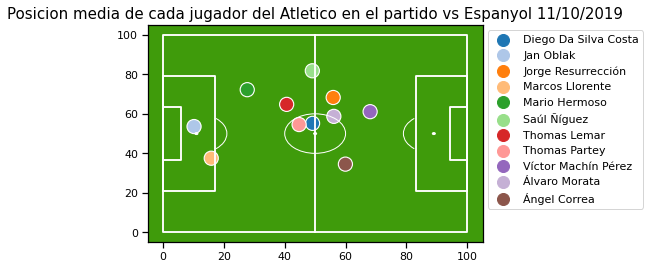

In [104]:
ax = pintar_campo('white')
sns.scatterplot(data = dfmediaAtletico, hue='jugador', x='x', y='y', s=200, palette="tab20", ax= ax )
plt.legend(loc=2, markerscale=2, bbox_to_anchor = (1 , 1))
plt.xlabel("")
plt.ylabel("")
plt.title("Posicion media de cada jugador del Atletico en el partido vs Espanyol 11/10/2019", fontsize=15)
plt.show()

# 9-Usando todos los datos del dataset de eventos crea un diagrama de barras en el que se indiquen los goles marcados por cada tipo de ‘posicion’

In [105]:
# Visualizar todos los goles
df_eventos_detalles[df_eventos_detalles['type_id']== 16]

,id,event_id,type_id,outcome,timestamp,x,y,year,month,day,posicion,jugador,equipo
229,2161505793,187,16,1,2019-10-30 18:24:04.268,88.6,38.8,2019,10,30,Central Midfielder,Enis Bardhi,Levante
623,2171689897,756,16,1,2019-12-14 13:47:58.361,80.3,50.3,2019,12,14,Central Midfielder,Enis Bardhi,Levante
1267,2195437851,623,16,1,2020-06-20 14:32:59.232,85.3,55.9,2020,6,20,Central Midfielder,Enis Bardhi,Levante
1384,2196912381,224,16,1,2020-06-28 13:36:28.465,91.5,73.2,2020,6,28,Central Midfielder,Enis Bardhi,Levante
1610,2199567345,681,16,1,2020-07-12 17:33:15.990,98.0,47.4,2020,7,12,Central Midfielder,Enis Bardhi,Levante
...,...,...,...,...,...,...,...,...,...,...,...,...,...
461713,2188207911,880,16,1,2020-03-01 21:49:43.145,96.8,35.6,2020,3,1,Striker,Mariano Díaz Mejía,Real Madrid
461956,2196289347,579,16,1,2020-06-24 19:52:43.42,91.1,65.8,2020,6,24,Full Back,Antonio Latorre Grueso,NaN
463725,2195280207,858,16,1,2020-06-18 22:36:47.676,90.9,59.1,2020,6,18,Winger,Marco Asensio,Real Madrid
463894,2199200067,595,16,1,2020-07-10 22:10:31.92,92.7,53.3,2020,7,10,Winger,Marco Asensio,Real Madrid


In [106]:
# Contar los goles y pasarlos a un dataframe
df_goles_marcados = df_eventos_detalles[df_eventos_detalles['type_id']== 16].groupby("posicion")["outcome"].count()
dfgm=df_goles_marcados.to_frame()
dfgm

,outcome
posicion,
Attacking Midfielder,87
Central Defender,58
Central Midfielder,84
Defensive Midfielder,13
Full Back,35
Goalkeeper,1
Second Striker,85
Striker,242
Wing Back,2


In [107]:
# Sacar las posiciones
posiciones_gol=df_goles_marcados.index.to_frame()
posiciones_gol

,posicion
posicion,
Attacking Midfielder,Attacking Midfielder
Central Defender,Central Defender
Central Midfielder,Central Midfielder
Defensive Midfielder,Defensive Midfielder
Full Back,Full Back
Goalkeeper,Goalkeeper
Second Striker,Second Striker
Striker,Striker
Wing Back,Wing Back


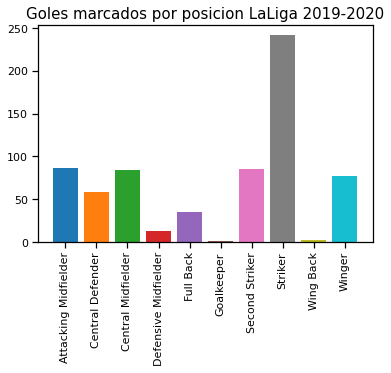

In [108]:
fig, axes = plt.subplots()
x = np.linspace(0, 1, 256) #x es un array con 256 valores con un rango de 0 a 1
number = 10
cmap = plt.get_cmap('tab10') #matplotlib color code
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for i, color in enumerate(colors, start=1):
    axes.bar(posiciones_gol['posicion'], dfgm['outcome'], color=colors)
plt.xticks(rotation=90) # # aquí selecciono la posición de la leyenda del eje x
axes.set_title("Goles marcados por posicion LaLiga 2019-2020", fontsize=15);
plt.show()

# 10- Usando todos los datos del dataset de eventos crea un gráfico de barras en el que se muestra el número de tarjetas que ha visto cada tipo de ‘posicion’

In [109]:
# Visualizar todos las tarjetas
df_eventos_detalles[df_eventos_detalles['type_id']== 17]

,id,event_id,type_id,outcome,timestamp,x,y,year,month,day,posicion,jugador,equipo
310,2162337423,428,17,1,2019-11-02 16:10:24.306,0.0,0.0,2019,11,2,Central Midfielder,Enis Bardhi,Levante
364,2164506957,425,17,1,2019-11-10 14:06:41.638,0.0,0.0,2019,11,10,Central Midfielder,Enis Bardhi,Levante
600,2171678881,522,17,1,2019-12-14 13:17:19.875,0.0,0.0,2019,12,14,Central Midfielder,Enis Bardhi,Levante
660,2173683303,435,17,1,2019-12-22 18:35:18.562,0.0,0.0,2019,12,22,Central Midfielder,Enis Bardhi,Levante
1423,2197658391,172,17,1,2020-07-01 21:16:25.291,0.0,0.0,2020,7,1,Central Midfielder,Enis Bardhi,Levante
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463378,2196583109,547,17,1,2020-06-26 22:41:50.646,0.0,0.0,2020,6,26,Central Defender,Javier Sánchez de Felipe,Real Valladolid
464192,2196284861,583,17,1,2020-06-24 19:44:45.894,0.0,0.0,2020,6,24,Central Midfielder,Martín Zubimendi,Real Sociedad
464259,2197783057,548,17,1,2020-07-02 19:42:33.219,0.0,0.0,2020,7,2,Central Midfielder,Martín Zubimendi,Real Sociedad
464331,2198555835,148,17,1,2020-07-06 18:45:18.995,0.0,0.0,2020,7,6,Central Midfielder,Martín Zubimendi,Real Sociedad


In [110]:
# Contar los tarjetas y pasarlos a un dataframe
df_tarjetas = df_eventos_detalles[df_eventos_detalles['type_id']== 17].groupby("posicion")["outcome"].count()
dft=df_tarjetas.to_frame()
dft

,outcome
posicion,
Attacking Midfielder,123
Central Defender,292
Central Midfielder,314
Defensive Midfielder,89
Full Back,283
Goalkeeper,47
Second Striker,31
Striker,166
Unknown,1


In [111]:
# Sacar las posiciones
df_posiciones_tarjeta=df_tarjetas.index.to_frame()
df_posiciones_tarjeta

,posicion
posicion,
Attacking Midfielder,Attacking Midfielder
Central Defender,Central Defender
Central Midfielder,Central Midfielder
Defensive Midfielder,Defensive Midfielder
Full Back,Full Back
Goalkeeper,Goalkeeper
Second Striker,Second Striker
Striker,Striker
Unknown,Unknown


In [112]:
# Pasar el resultado anterior a un Dataframe
posiciones_tarjeta=df_posiciones_tarjeta.index.to_frame()
posiciones_tarjeta

,posicion
posicion,
Attacking Midfielder,Attacking Midfielder
Central Defender,Central Defender
Central Midfielder,Central Midfielder
Defensive Midfielder,Defensive Midfielder
Full Back,Full Back
Goalkeeper,Goalkeeper
Second Striker,Second Striker
Striker,Striker
Unknown,Unknown


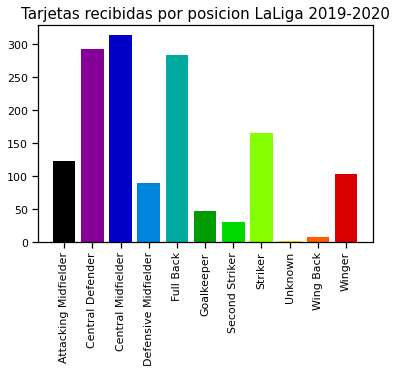

In [114]:
fig, axes = plt.subplots()
x = np.linspace(0, 1, 256)
number = 12
cmap = plt.get_cmap('nipy_spectral') #matplotlib color code
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for i, color in enumerate(colors, start=1):
    axes.bar(posiciones_tarjeta['posicion'], dft['outcome'], color=colors)
plt.xticks(rotation=90)
axes.set_title("Tarjetas recibidas por posicion LaLiga 2019-2020", fontsize=15);
plt.show()